## Lead Scoring Case Study
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas, NumPy, Matplotlib, Seaborn
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Data Inspection

In [4]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

#### There are 9240 rows and 37 columns in the leads dataset.

In [5]:
# checking non null count and datatype of the variables
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### All the dataypes of the variables are in correct format but there are a few columns with null values and we have to handle them.

In [6]:
# Describing data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### There are missing values present in the data which must be hanlded.

## Step 3: Data Cleaning

### Handling the 'Select' level that is present in many of the categorical variables.
#### There are 'Select' values in many columns. It may be because the customer did not select any option from the list. So, it shows 'Select'.
#### 'Select' values are as good as NULL. So they can be converted to null values.

In [7]:
# Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)

In [8]:
# checking the columns for null values
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Finding the null percentages across columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### Some columns have high percentage of missing values (> 40%). 
#### So, drop the columns with missing values greater than 40%.

In [10]:
# dropping the columns with missing values greater than 40% .
leads_data=leads_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [11]:
# Finding the null percentages across columns after removing the above columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### City column has 40% missing values

In [12]:
leads_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Most of the values or mode for City column is 'Mumbai' and so let's impute missing values in this column with this value.

In [13]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads_data['City']=leads_data['City'].replace(np.nan,'Mumbai')

### Specialization column has 37% missing values

In [14]:
leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### It is possible that the leads may leave this column blank if he/she may be a student or not having any specialization or his specialization is not there in the options given. 

#### So, let's replace all null/missing values with 'Others' as a new Category so that the leads can select 'Others' option if none of the values from the above list of Specialization is applicable to them.

In [15]:
# Imputing the missing data in the Specialization column with 'Others'
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Others')

### Tags column has 36% missing values

In [16]:
leads_data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Most of the values or mode for Tags column is 'Will revert after reading the email' and so let's impute missing values in this column with this value.

In [17]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads_data['Tags']=leads_data['Tags'].replace(np.nan,'Will revert after reading the email')

### 'What matters most to you in choosing a course' column has 29% missing values

In [18]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Finding the percentage of the different categories of this column:
round(leads_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

#### This is highly skewed column and so let's remove this column.

In [20]:
# Dropping this column 
leads_data=leads_data.drop('What matters most to you in choosing a course',axis=1)

### 'What is your current occupation' column has 29% missing values

In [21]:
# Finding the percentage of the different categories of this column
round(leads_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

#### Most of the values or mode for 'What is your current occupation' column is 'Unemployed' and so let's impute missing values in this column with this value.

In [22]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan,'Unemployed')

### Country column has 27% missing values

In [23]:
# Finding the percentage of the different categories of this column
round(leads_data['Country'].value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

#### Country column is highly skewed column but it is an important information in termsn of the lead and so let's not drop this column.
#### Most of the values or mode for Country column is 'India' and so let's impute missing values in this column with this value.

In [24]:
# Imputing the missing data in the 'Country' column with 'India'
leads_data['Country']=leads_data['Country'].replace(np.nan,'India')

In [25]:
# Finding the null percentages across columns after removing the above columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### Missing values for the rest of the columns are under 2% and so let's drop these rows.

In [26]:
# Dropping the rows with null values
leads_data.dropna(inplace = True)

In [27]:
# Finding the null percentages across columns after removing the above columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### There is no more missing values in the dataset.

In [28]:
# Percentage of rows retained 
(len(leads_data.index)/9240)*100

98.2034632034632

#### 98% of the rows are retained after cleaning the data .

## Step 4: Exploratory Data Anaysis

### Checking for duplicates

In [29]:
leads_data[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### There are no duplicate records in the leads dataset.

### Univariate Analysis and Bivariate Analysis

### Converted Column - Target Variable

####  Converted column indicates whether a lead is successfully converted (1) or not (0).

In [30]:
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

37.85541106458012

#### Percentage of lead conversion is 38%.

In [31]:
# function to plot the count plot
def count_plot(var, figSizeX=5, figSizeY=3):
    for x in var:
        plt.figure(figsize=(figSizeX,figSizeY))
        sns.countplot(x = x, hue = "Converted", data = leads_data,palette='Set2')
        plt.xticks(rotation = 90)

In [32]:
# function to plot 2 count plots
def count_plots_2(var1, var2, figSizeX=10, figSizeY=3):
    plt.figure(figsize=(figSizeX,figSizeY))
    plt.subplot(1, 2, 1)
    sns.countplot(x = var1, hue = "Converted", data = leads_data,palette='Set2')
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    sns.countplot(x = var2, hue = "Converted", data = leads_data,palette='Set2')
    plt.xticks(rotation = 90)
        

In [33]:
# function to plot the box plot
def box_plot(var):
    sns.boxplot(y=leads_data[var],palette='Set2')

### Lead Source Column

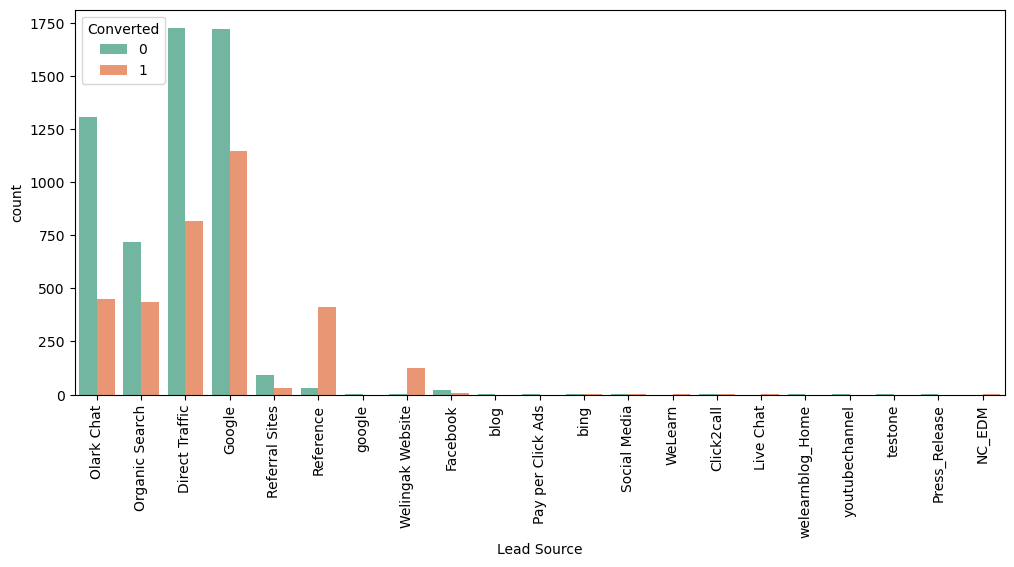

In [34]:
count_plot(['Lead Source'], 12, 5)

In [35]:
# Replace 'google' with 'Google'
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')

In [36]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

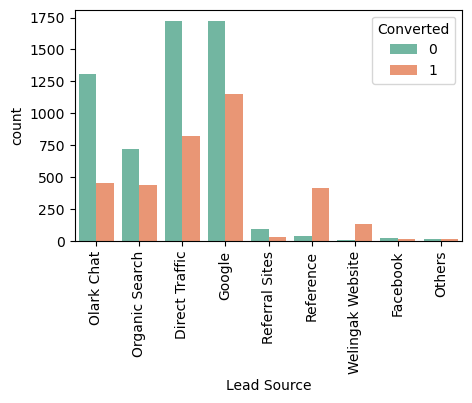

In [37]:
# Visualizing again
count_plot(['Lead Source'])

#### Google and Direct traffic generates maximum number of leads.
#### Improvement should be done on lead converion of olark chat, organic search, direct traffic, and google leads.
#### Also, more leads from reference and welingak website should be generated.

### Last Activity Column

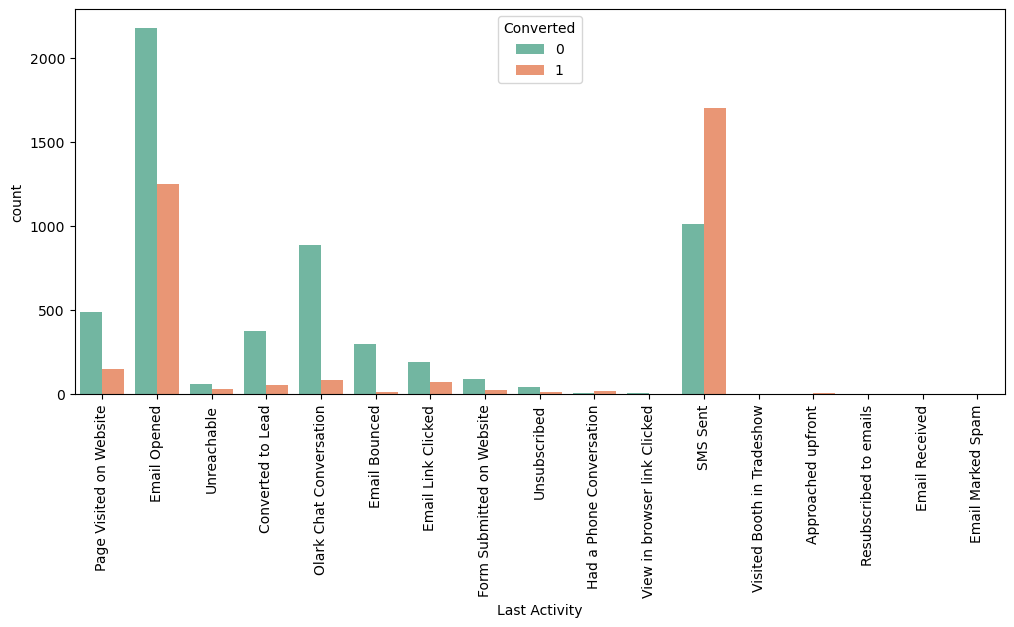

In [38]:
count_plot(['Last Activity'], 12, 5)

In [39]:
# Let's club the categories of last activity to "Other_Activity" which are having less data.
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

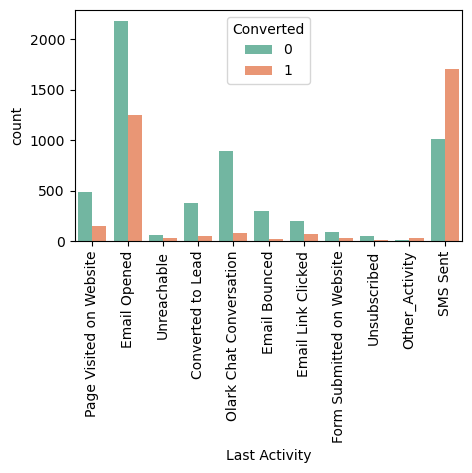

In [40]:
# Visualizing again
count_plot(['Last Activity'])

#### Most of the leads have 'Email Opened' as their last activity.
#### Conversion rate for leads with last activity as 'SMS Sent' is the highest and almost 60%.

### Columns: Lead Origin, Do Not Email

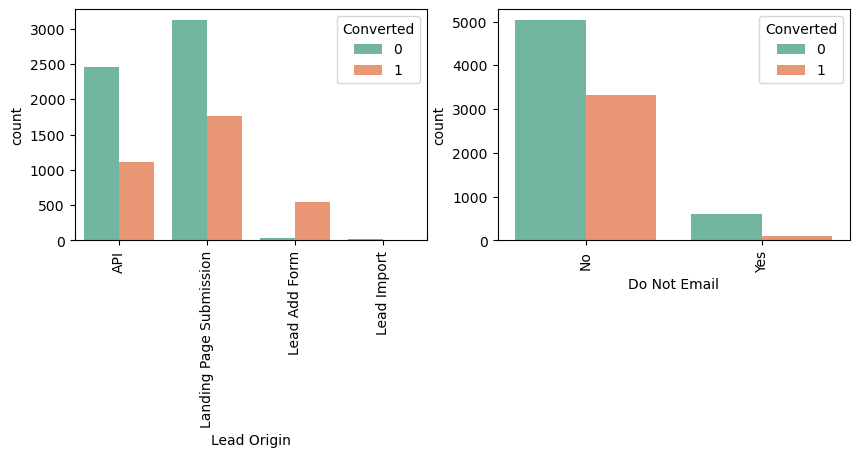

In [41]:
count_plots_2('Lead Origin', 'Do Not Email')

#### Lead Origin:
##### API and Landing Page Submission have 30-35% conversion rate and the count of leads originated from them are quite high.
##### Lead Add Form has more than 90% conversion rate but count of lead are not very high.
##### Lead Import are very less in count.
##### To improve overall lead conversion rate, impovement should be done on the lead converion of API and Landing Page Submission origin and create more leads from Lead Add Form.


#### Do Not Email:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Columns: Do Not call, Specialization

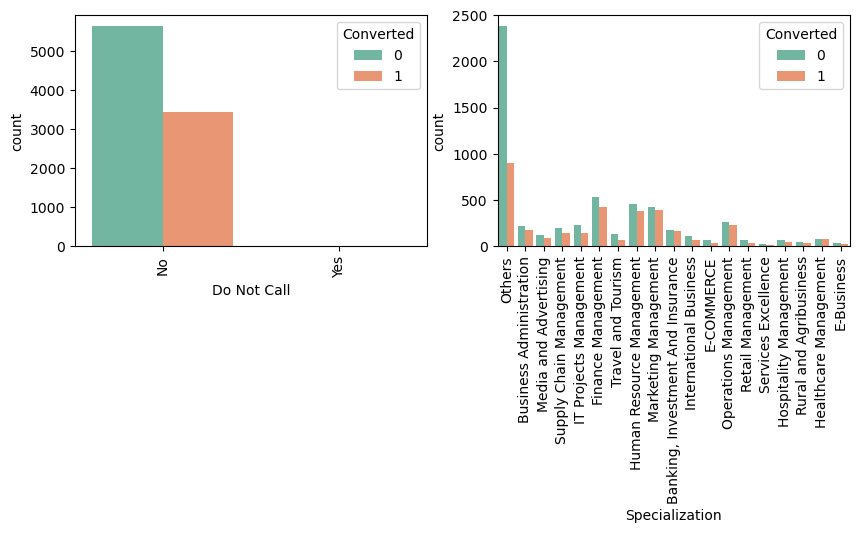

In [42]:
count_plots_2('Do Not Call', 'Specialization')

#### Do Not Call:
##### Most entries are 'No'. Nothing can be drawn with this parameter.


#### Specialization:
##### Others category has high conversion rate and so focus should be more on this Specialization.

### Column: Country

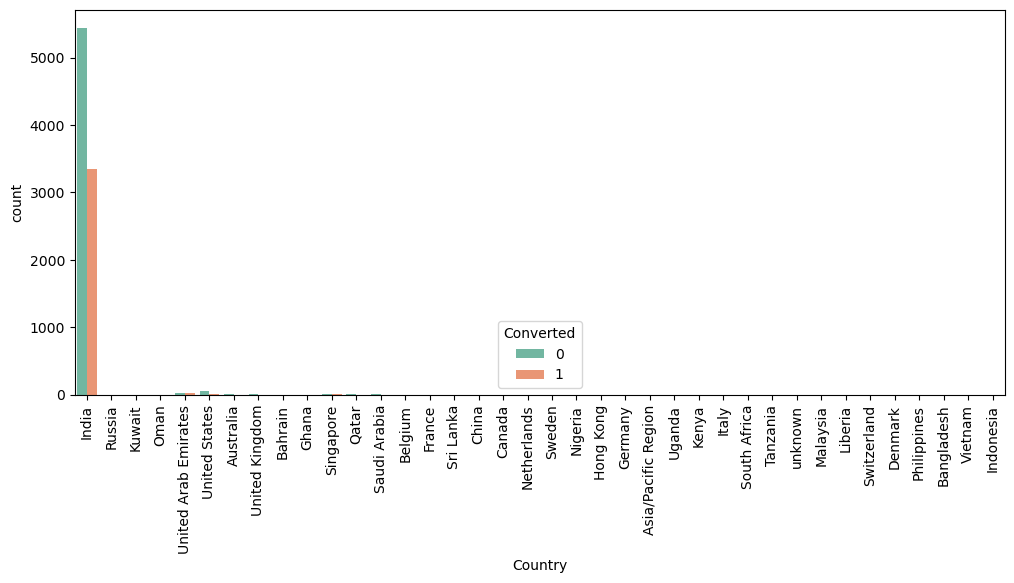

In [43]:
count_plot(['Country'], 12, 5)

#### Most values are 'India'. So, nothing can be drawn from this.

### Columns: What is your current occupation, Search

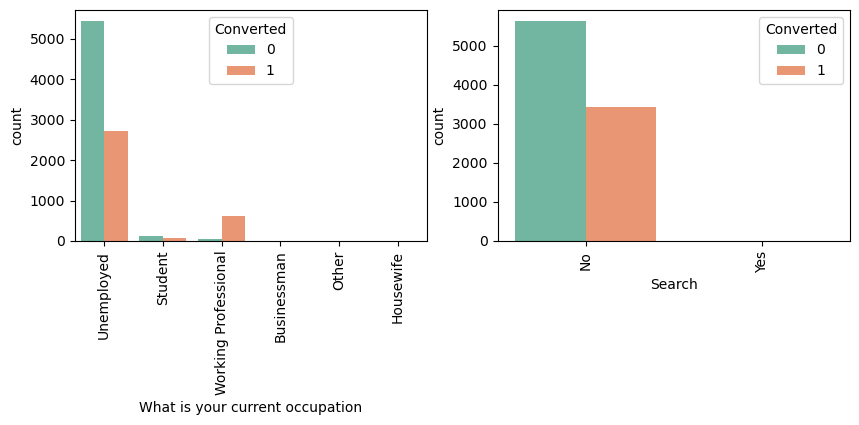

In [44]:
count_plots_2('What is your current occupation', 'Search')

#### What is your current occupation:
##### Working Professionals have high chances of joining it.
##### Unemployed leads are the highest in count but has around only 30-35% conversion rate.


#### Search:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Columns: Magazine, Newspaper Article

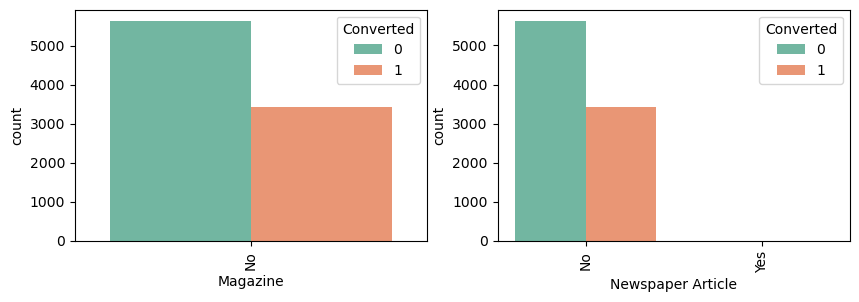

In [45]:
count_plots_2(  'Magazine', 'Newspaper Article')

#### Magazine:
##### Most entries are 'No'. Nothing can be drawn with this parameter.


#### Newspaper Article:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Columns: X Education Forums, Newspaper

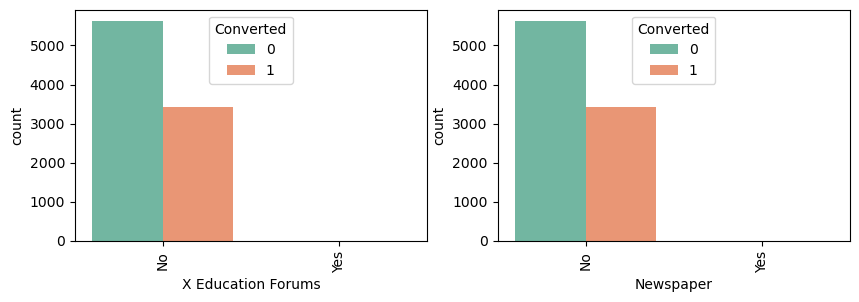

In [46]:
count_plots_2('X Education Forums', 'Newspaper')

#### X Education Forums:
##### Most entries are 'No'. Nothing can be drawn with this parameter.


#### Newspaper:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Columns: Digital Advertisement, Through Recommendations

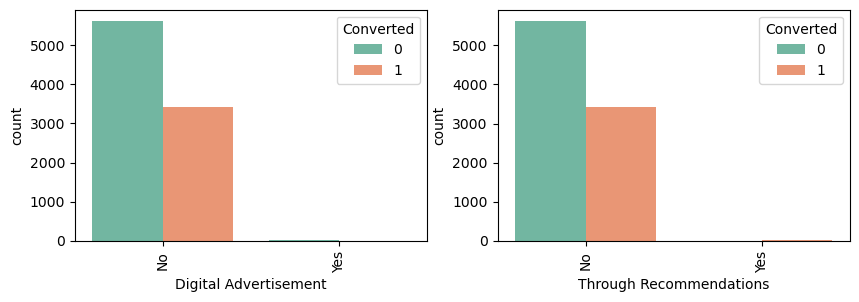

In [47]:
count_plots_2('Digital Advertisement', 'Through Recommendations')

#### Digital Advertisement:
##### Most entries are 'No'. Nothing can be drawn with this parameter.


#### Through Recommendations:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Columns: Receive More Updates About Our Courses, Update me on Supply Chain Content

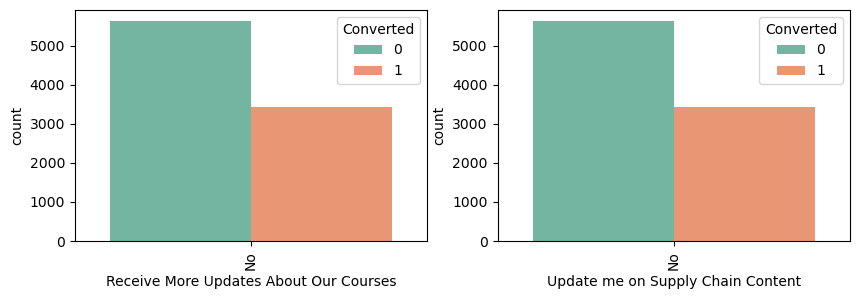

In [48]:
count_plots_2('Receive More Updates About Our Courses', 'Update me on Supply Chain Content')

#### Receive More Updates About Our Courses:
##### Most entries are 'No'. Nothing can be drawn with this parameter.


#### Update me on Supply Chain Content:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Column: Tags

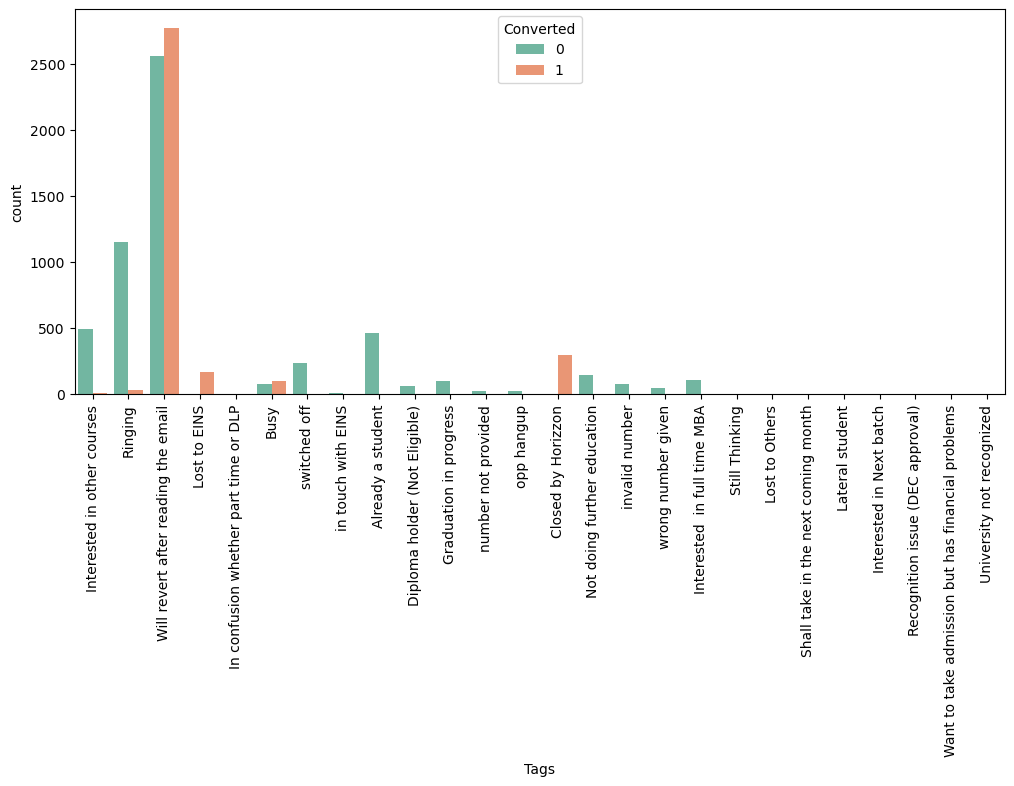

In [49]:
count_plot(['Tags'], 12, 5)

#### Since Tags column is generated by the sales team for their analysis, so this is not available for model building. 
#### So we will have to remove this column before building the model.

### Columns: Get updates on DM Content, City

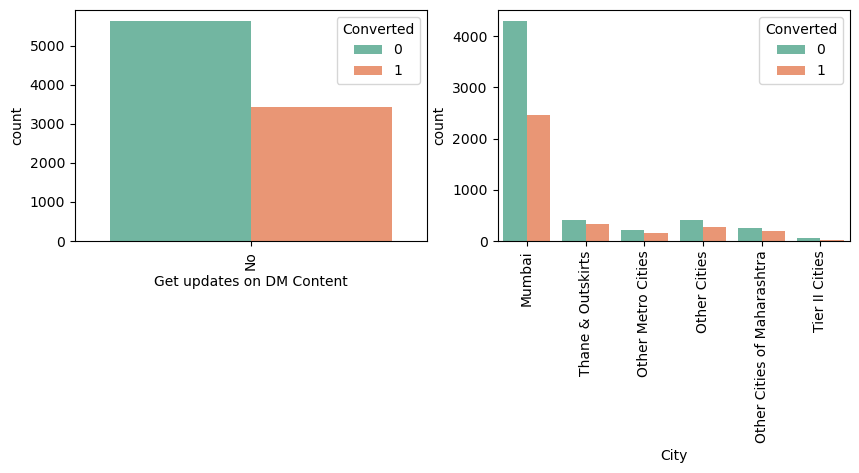

In [50]:
count_plots_2( 'Get updates on DM Content', 'City')

#### Get updates on DM Content:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

#### City:
##### Most leads are from mumbai with around 50% conversion rate.

### Columns: I agree to pay the amount through cheque, A free copy of Mastering The Interview

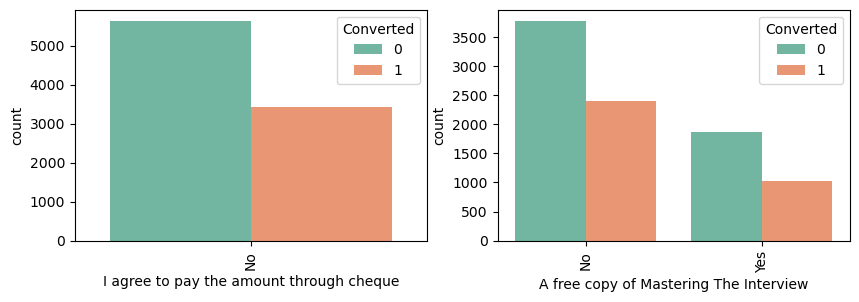

In [51]:
count_plots_2('I agree to pay the amount through cheque', 'A free copy of Mastering The Interview')

#### I agree to pay the amount through cheque:
##### Most entries are 'No'. Nothing can be drawn with this parameter.

#### A free copy of Mastering The Interview
##### Most entries are 'No'. Nothing can be drawn with this parameter.

### Column: Last Notable Activity 

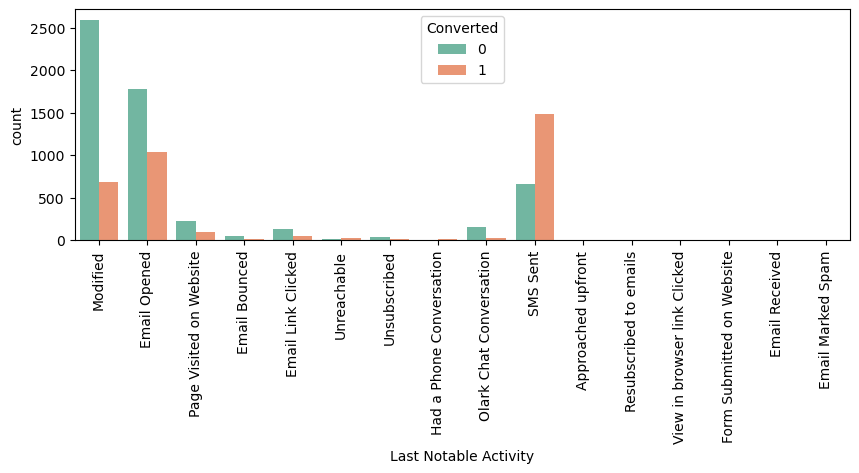

In [52]:
count_plot(['Last Notable Activity'],10)

## Treating Outliers

### Page Views Per Visit Column

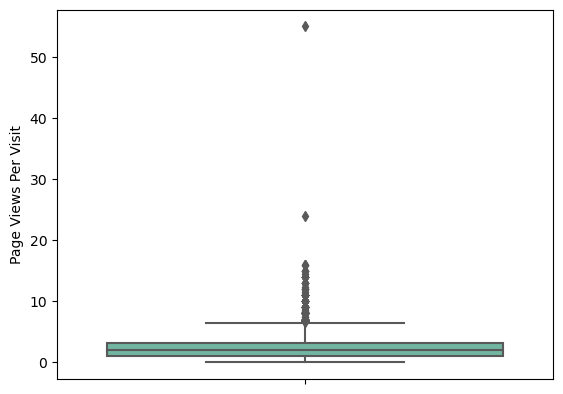

In [53]:
box_plot('Page Views Per Visit')

#### There are outliers in the data. Let's cap the outliers to 95% value for analysis.

In [54]:
perc = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values

In [55]:
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= perc[0]] = perc[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= perc[1]] = perc[1]

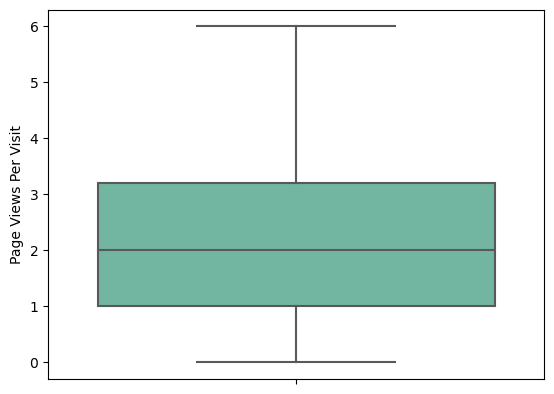

In [56]:
# Visualizing again
box_plot('Page Views Per Visit')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

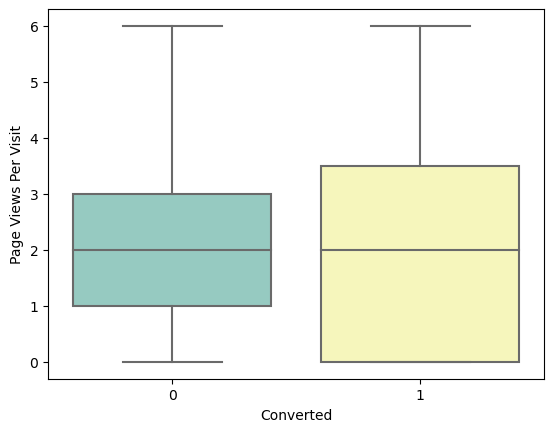

In [57]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads_data,palette='Set3')

#### Median for converted and unconverted leads is the same (around 2).
#### So, it is difficult to interpret lead conversion from Page Views Per Visit.

### Total Time Spent on Website Column

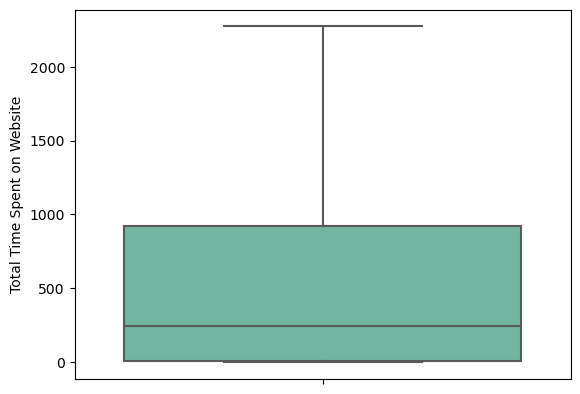

In [58]:
box_plot('Total Time Spent on Website')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

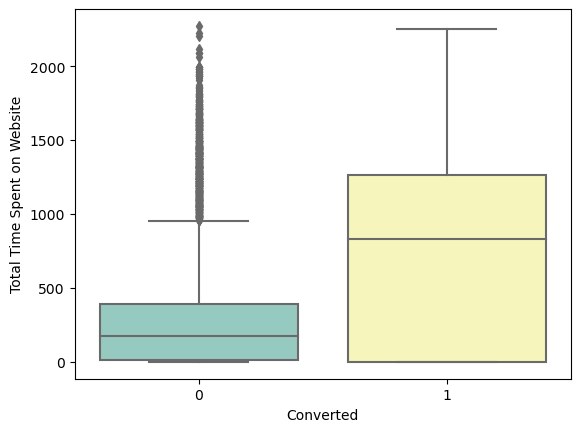

In [59]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=leads_data, palette='Set3')

#### Leads spending more time on the weblise are more likely to be converted.
#### Making website more engaging can get the leads to spend more time.

### TotalVisits Column

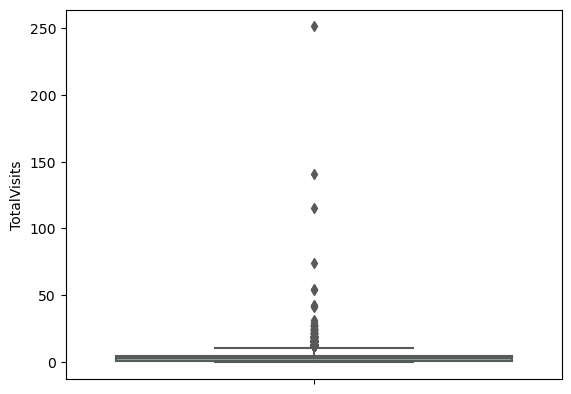

In [60]:
box_plot('TotalVisits')

#### There are outliers in the data. Let's cap the outliers to 95% value for analysis.

In [61]:
perc = leads_data['TotalVisits'].quantile([0.05,0.95]).values

In [62]:
leads_data['TotalVisits'][leads_data['TotalVisits'] <= perc[0]] = perc[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= perc[1]] = perc[1]

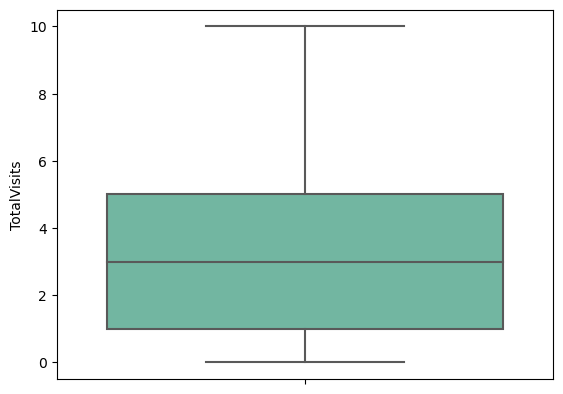

In [63]:
box_plot('TotalVisits')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

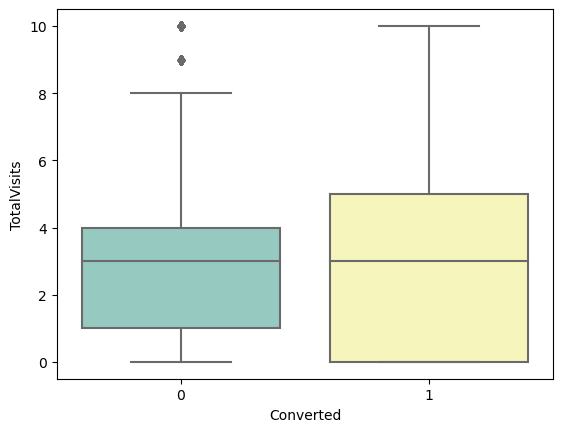

In [64]:
sns.boxplot(y='TotalVisits', x='Converted', data=leads_data,palette='Set3')

#### Median for converted and not converted leads is the same.
#### So, it is difficult to conclude anything on the basis of TotalVisits.

### With the help of univariate analysis, it is observred that many columns are not adding any useful information to the model. 
### So, let's drop them for further analysis and model building.

In [65]:
leads_data = leads_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [66]:
leads_data.shape

(9074, 14)

In [67]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Step 5: Data Preparation

### Convert binary variables (Do Not Email and Do Not Call - Yes/No) to 1/0

In [68]:
leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'Yes': 1, 'No': 0})

In [69]:
leads_data['Do Not Call'] = leads_data['Do Not Call'].map({'Yes': 1, 'No': 0})

### Creating Dummy Variables for the Categorical Features

In [70]:
# Creating dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Concatenating the dummy_data to the lead_data dataframe
leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


### Drop the columns for which dummies were created

In [72]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [73]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Split the data into train and test set

In [74]:
# import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
# Put feature variables to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [76]:
# Assign target variable to y
y = leads_data['Converted']

In [77]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scale the features

In [79]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [80]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
# Check the Lead Conversion rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

#### Lead conversion rate is 37.86%.

## Step 6: Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [83]:
logreg = LogisticRegression()

In [84]:
# Run RFE with 20 variables as output   
rfe = RFE(logreg,n_features_to_select=20, step=1)                    
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

In [87]:
# View columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Ret

## Step 7: Logistic Regression Model Building

## Model 1

In [89]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Mon, 17 Jul 2023   Deviance:                       5180.6
Time:                        23:15:47   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

#### P-value of 'What is your current occupation_Housewife' column is very high, let's drop this column.

In [90]:
#dropping the column having high p-value hence making the feature insignificant
cols1 = cols.drop('What is your current occupation_Housewife')

## Model 2

In [91]:
X_train_sm = sm.add_constant(X_train[cols1])
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Mon, 17 Jul 2023   Deviance:                       5184.5
Time:                        23:15:47   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

#### P-value of 'Last Notable Activity_Had a Phone Conversation' column is very high, let's drop this column.

In [92]:
#dropping the column having high p-value hence making the feature insignificant
cols1 = cols1.drop('Last Notable Activity_Had a Phone Conversation')

## Model 3

In [93]:
X_train_sm = sm.add_constant(X_train[cols1])
m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 17 Jul 2023   Deviance:                       5186.1
Time:                        23:15:47   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

#### P-value of 'What is your current occupation_Student' column is very high, let's drop this column.

In [94]:
#dropping the column having high p-value hence making the feature insignificant
cols1 = cols1.drop('What is your current occupation_Student')

## Model 4

In [95]:
X_train_sm = sm.add_constant(X_train[cols1])
m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Mon, 17 Jul 2023   Deviance:                       5189.0
Time:                        23:15:47   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

#### P-value of 'Lead Origin_Lead Add Form' column is very high, let's drop this column.

In [96]:
cols1 = cols1.drop('Lead Origin_Lead Add Form')

## Model 5

In [97]:
X_train_sm = sm.add_constant(X_train[cols1])
m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Mon, 17 Jul 2023   Deviance:                       5192.3
Time:                        23:15:48   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

In [98]:
#checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values, i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


#### 'What is your current occupation_Unemployed' column has high VIF, let's drop this column.

In [99]:
#dropping the column having high VIF hence making the feature insignificant
cols1 = cols1.drop('What is your current occupation_Unemployed')

## Model 6

In [100]:
#model 6
X_train_sm = sm.add_constant(X_train[cols1])
m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Mon, 17 Jul 2023   Deviance:                       5200.0
Time:                        23:15:48   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

#### P-value of 'Lead Origin_Lead Import' column is very high, let's drop this column.

In [101]:
#dropping the column having high p-value hence making the feature insignificant
cols1 = cols1.drop('Lead Origin_Lead Import')

## Model 7

In [102]:
X_train_sm = sm.add_constant(X_train[cols1])
m7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Mon, 17 Jul 2023   Deviance:                       5203.0
Time:                        23:15:48   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [103]:
#checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values, i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [104]:
#dropping the column having non zero p-value to reduce the variables.
cols1 = cols1.drop('Last Activity_Unsubscribed')

## Model 8

In [105]:
X_train_sm = sm.add_constant(X_train[cols1])
m8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Mon, 17 Jul 2023   Deviance:                       5210.2
Time:                        23:15:48   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [106]:
#checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values, i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [107]:
#dropping the column having non zero p-value to reduce the variables.
cols1 = cols1.drop('Last Notable Activity_Unreachable')

## Model 9

In [108]:
X_train_sm = sm.add_constant(X_train[cols1])
m9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Mon, 17 Jul 2023   Deviance:                       5221.0
Time:                        23:15:49   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [109]:
#checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values, i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


#### Note: Model 9 with 12 variables is our final model in which features are having 0 as p-values and accepted level of VIF.

## Step 8- Making Predictions

In [110]:
#Train set
y_train_pred = result.predict(X_train_sm)

In [111]:
#creating a dataframe with probabilities assigned
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


In [112]:
# Now choosing arbitrary threshold as 0.5 and predicting
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


In [113]:
#confusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


In [114]:
#accuracy
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


In [115]:
#Other metrics which are important for business like specificity, precision , recall etc.
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
#Sensitivity
print("Sensitivity : ",TP / (TP+FN))

Sensitivity :  0.7060506950122649


In [117]:
#Specificity
print("Specificity : ",TN / (TN+FP))

Specificity :  0.8862996158770806


In [118]:
#other metrics
print("False Positive Rate :",FP/ (TN+FP))
print("Positive Predictive Value :",TP / (TP+FP))
print ("Negative predictive value :",TN / (TN+ FN))

False Positive Rate : 0.11370038412291933
Positive Predictive Value : 0.7954859511745739
Negative predictive value : 0.8279904306220096


#### Note: It can be clearly seen that our model is good on Specificity (~88%) but lacks on Sensitivity(only ~70%) as we have not chosen an optimal threshold 

## Step 9- Using ROC Curve to get the optimal cut-off point

In [119]:
#Using ROC curve to get the optimal threshold for probability
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

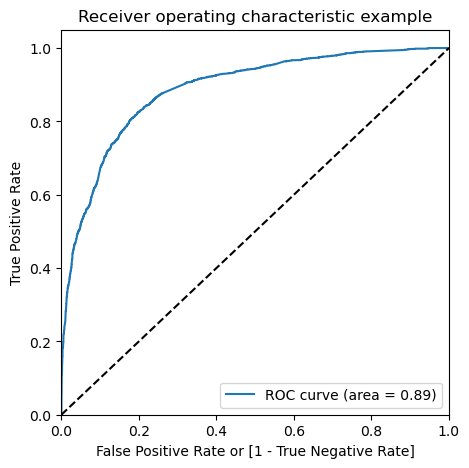

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Note: It is apparent that our model is fit as area under curve is higher 0.89

In [121]:
#finding the optimal threshold for the probability to get balanced sensitivity and specificity

#creating columns for each probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [122]:
# Calculating accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


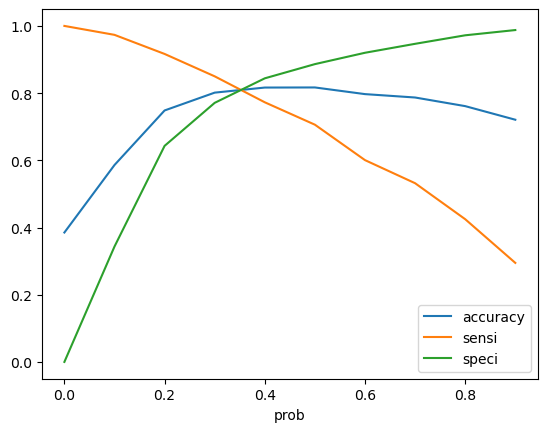

In [123]:
#plotting accuracy,sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Note: From the curve above, 0.34 is the optimum value to take it as a cutoff for the probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data

In [125]:
#Lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


## Step 10- Model Evaluation

In [126]:
#accuracy
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [127]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [128]:
#other metrics evaluation
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
#Sensitivity
print("Sensitivity : ",TP / (TP+FN))
#Specificity
print("Specificity : ",TN / (TN+FP))
#other metrics
print("False Positive Rate :",FP/ (TN+FP))
print("Positive Predictive Value :",TP / (TP+FP))
print ("Negative predictive value :",TN / (TN+ FN))

Sensitivity :  0.8172526573998364
Specificity :  0.8069142125480153
False Positive Rate : 0.19308578745198463
Positive Predictive Value : 0.7261169633127498
Negative predictive value : 0.8757643135075042


In [130]:
#precision and recall
from sklearn.metrics import precision_score, recall_score

In [131]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7954859511745739
Recall : 0.7060506950122649


In [132]:
from sklearn.metrics import precision_recall_curve

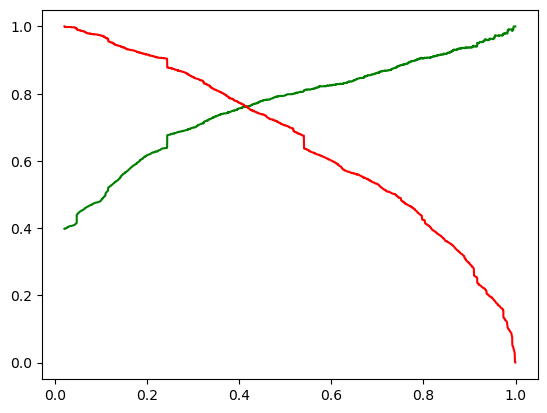

In [133]:
#precision vs recall plot
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11 - Making Prediction on the Test Data Set

In [134]:
# Scale the test data 
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [135]:
# Assign the columns selected by the final model to the X_test 
X_test = X_test[cols1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [136]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
          ...   
850     0.191657
2879    0.127680
6501    0.854745
7155    0.112011
376     0.086451
Length: 2723, dtype: float64

In [137]:
y_pred_1 = pd.DataFrame(y_test_pred) # Converting y_test_pred to a dataframe which is an array
y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe
y_test_df['Prospect ID'] = y_test_df.index # Put Prospect ID to index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True) 
y_test_df.reset_index(drop=True, inplace=True)


y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1) # Append y_test_df and y_pred_1
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [138]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'}) # Renaming the column 
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob']) # Rearranging the columns
y_pred_final.head() 

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [139]:
#final predicted column
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [140]:
#accuracy
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [141]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [142]:
# Other metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Sensitivity
print("Sensitivity : ",TP / (TP+FN))
# Specificity
print("Specificity : ",TN / (TN+FP))
# Other metrics
print("False Positive Rate :",FP/ (TN+FP))
print("Positive Predictive Value :",TP / (TP+FP))
print ("Negative predictive value :",TN / (TN+ FN))

Sensitivity :  0.8048533872598584
Specificity :  0.8050749711649365
False Positive Rate : 0.19492502883506344
Positive Predictive Value : 0.7019400352733686
Negative predictive value : 0.8785399622404028


In [144]:
# Assign lead score to testing data
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


## Results



### Comparing the values obtained for Train & Test:

#### Train Data: Accuracy : 81.0 %     Sensitivity : 81.7 %        Specificity : 80.6 %

#### Test Data: Accuracy : 80.4 %      Sensitivity : 80.49 %      Specificity : 80.5 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate according to the requirement. Business can be confident on using this model.

In [145]:
# The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. 
# They can be termed as 'Hot Leads'.
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969057,1,97
8,4223,1,0.916621,1,92
16,1946,1,0.924467,1,92
21,2461,1,0.992551,1,99
23,5822,1,0.997991,1,100
...,...,...,...,...,...
2694,1566,1,0.947723,1,95
2699,6461,1,0.961562,1,96
2703,5741,1,0.908283,1,91
2715,6299,1,0.871977,1,87


In [146]:
# Important Features from our final model
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64

## Observations

<font color = green>1. The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

<font color = green>2. The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

<font color = green>3. The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

<font color = green>4. The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

<font color = green>5. The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

<font color = green>6. The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

<font color = green>7. The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

<font color = green>8. The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

<font color = green>9. The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.

<font color = green>10. The company should not make calls to the leads whos Last Notable Activity is 'Modified' as they are not likely to get converted. 